### Configuring dependencies

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_parquet(r"C:\Ayub Indra\Data Analyst\DSLS 2023\Mini Project Data Scientist\Datasets\final\final dataset.parquet")

In [3]:
df

,time,street,level,median_length,median_delay,median_speed_kmh,geometry
0,2022-07-06 00:00:00,Pahlawan,2,784.0,62.0,20.310001,"MULTILINESTRING ((106.797269 -6.608899, 106.79..."
1,2022-07-06 00:00:00,Tol Lingkar Luar Bogor,2,1314.0,63.0,37.710000,"LINESTRING (106.787027 -6.559782, 106.787701 -..."
2,2022-07-06 00:00:00,N8 Jalan Raya Sukabumi,3,379.0,117.5,8.594999,"MULTILINESTRING ((106.845486 -6.6594, 106.8454..."
3,2022-07-06 01:00:00,N9 Jalan Raya Pajajaran,2,808.0,73.0,19.920000,"LINESTRING (106.804346 -6.595963, 106.80472 -6..."
4,2022-07-06 01:00:00,Tol Lingkar Luar Bogor,1,2812.0,128.5,43.400000,"LINESTRING (106.787027 -6.559782, 106.787701 -..."
...,...,...,...,...,...,...,...
50664,2022-09-04 23:00:00,Kapten Yusuf,3,402.0,106.0,9.080000,"MULTILINESTRING ((106.787318 -6.614671, 106.78..."
50665,2022-09-06 00:00:00,N9 KS Tubun,2,327.0,67.0,9.620000,"MULTILINESTRING ((106.810069 -6.56609, 106.809..."
50666,2022-09-06 00:00:00,Tol Jagorawi,2,3377.0,116.0,39.030000,"LINESTRING (106.831594 -6.604101, 106.831608 -..."
50667,2022-09-06 00:00:00,N9 Jalan Raya Tajur,1,2625.0,107.5,29.235000,"LINESTRING (106.83008 -6.637004, 106.831101 -6..."


In [150]:
model_df = df.groupby('street')[['level','median_length', 'median_delay', 'median_speed_kmh']].mean().reset_index()
model_df

,street,level,median_length,median_delay,median_speed_kmh
0,AH Nasution,2.111111,294.000000,229.574074,4.224815
1,Achmad Adnawijaya,2.040665,768.286506,99.292976,14.823281
2,Airlangga,3.000000,175.000000,134.000000,3.740000
3,Akses Tol Tajur,4.000000,178.983871,178.322581,3.490806
4,Al-Hasanah,4.000000,205.000000,119.000000,4.520000
...,...,...,...,...,...
448,Warung Nangka,1.250000,783.000000,107.687500,11.382500
449,Waterfall Blvd,3.000000,202.000000,165.000000,3.300000
450,Wijaya Kusuma,1.783333,459.600000,87.783333,8.714167
451,Wijaya Kusuma Raya,2.500000,355.500000,110.000000,6.695000


### Clustering

In [151]:
X = model_df.iloc[:, 2:5].to_numpy()
X

array([[294.        , 229.57407407,   4.22481483],
       [768.28650647,  99.29297597,  14.82328095],
       [175.        , 134.        ,   3.74      ],
       ...,
       [459.6       ,  87.78333333,   8.71416667],
       [355.5       , 110.        ,   6.695     ],
       [396.        , 115.36363636,   7.89060605]])

c:\Users\ayubi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ayubi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ayubi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ayubi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

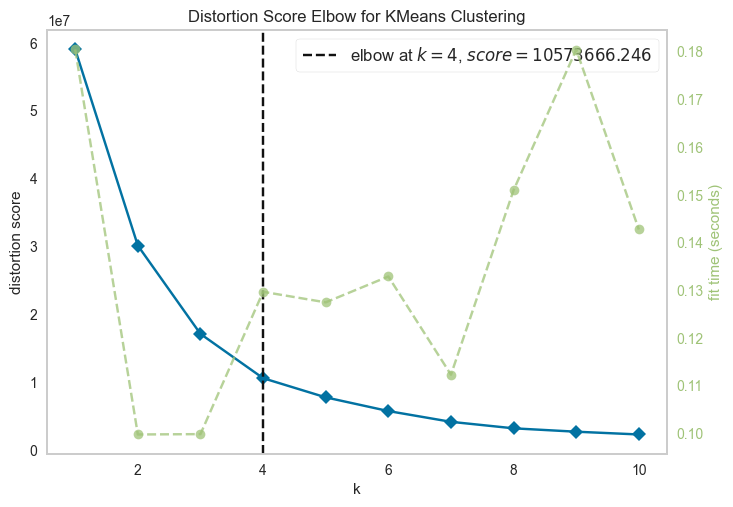

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [132]:
min_cluster = 1
max_cluster = 10

model = KElbowVisualizer(kmeans, k=(min_cluster, max_cluster+1))
model.fit(X)
model.show()

c:\Users\ayubi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ayubi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ayubi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ayubi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

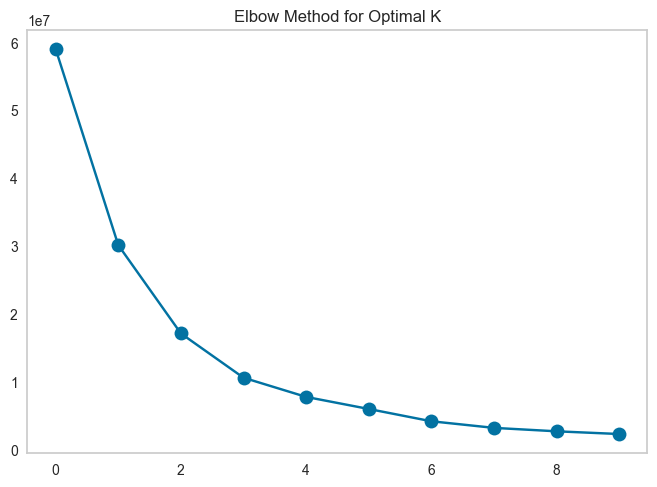

In [133]:
K = range(min_cluster, max_cluster+1)
SSE = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    model = kmeans.fit(X)
    SSE.append(model.inertia_)
plt.title('Elbow Method for Optimal K')
plt.plot(SSE, marker='o', markersize=10)

In [160]:
cluster = KMeans(n_clusters=4, random_state=0, n_init="auto")
cluster.fit(X)
clusters = cluster.labels_ 
# print(len(clusters))
# cluster.cluster_centers_
model_df['Cluster'] = cluster.predict(X)

In [161]:
model_df

,street,level,median_length,median_delay,median_speed_kmh,Cluster
0,AH Nasution,2.111111,294.000000,229.574074,4.224815,0
1,Achmad Adnawijaya,2.040665,768.286506,99.292976,14.823281,2
2,Airlangga,3.000000,175.000000,134.000000,3.740000,0
3,Akses Tol Tajur,4.000000,178.983871,178.322581,3.490806,0
4,Al-Hasanah,4.000000,205.000000,119.000000,4.520000,0
...,...,...,...,...,...,...
448,Warung Nangka,1.250000,783.000000,107.687500,11.382500,2
449,Waterfall Blvd,3.000000,202.000000,165.000000,3.300000,0
450,Wijaya Kusuma,1.783333,459.600000,87.783333,8.714167,2
451,Wijaya Kusuma Raya,2.500000,355.500000,110.000000,6.695000,0


In [162]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   street            453 non-null    object 
 1   level             453 non-null    float64
 2   median_length     453 non-null    float64
 3   median_delay      453 non-null    float64
 4   median_speed_kmh  453 non-null    float64
 5   Cluster           453 non-null    int32  
dtypes: float64(4), int32(1), object(1)
memory usage: 19.6+ KB


### Analysis

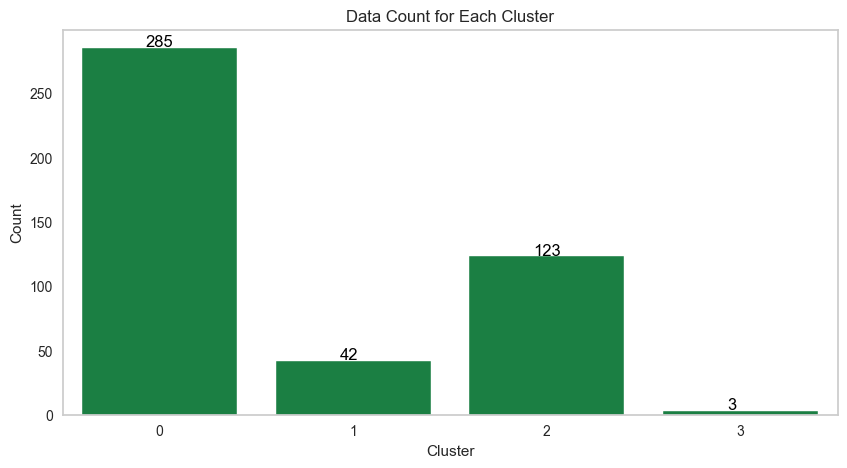

In [147]:
# Data Count for Each Cluster
plt.figure(figsize=(10, 5))
ax = sns.countplot(x=model_df["Cluster"], color='#0a9040')
ax.set_title("Data Count for Each Cluster")
ax.set_ylabel("Count")
x_offset = -0.07
y_offset = 1
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0) 
    ax.annotate(val, 
                ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset), 
                color='black')

In [107]:
numeric = ['median_length', 'median_delay', 'median_speed_kmh']

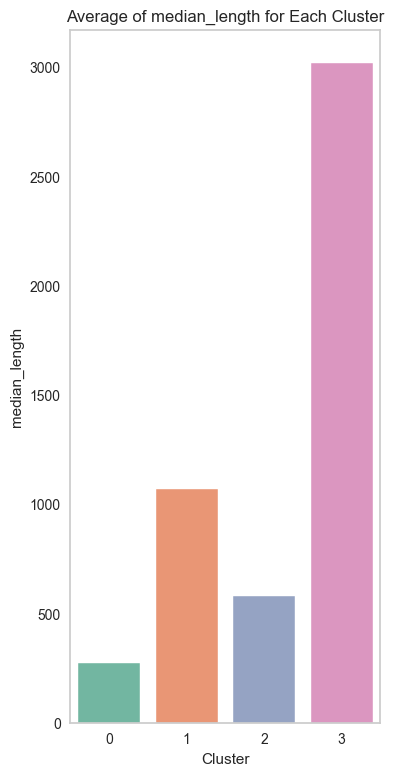

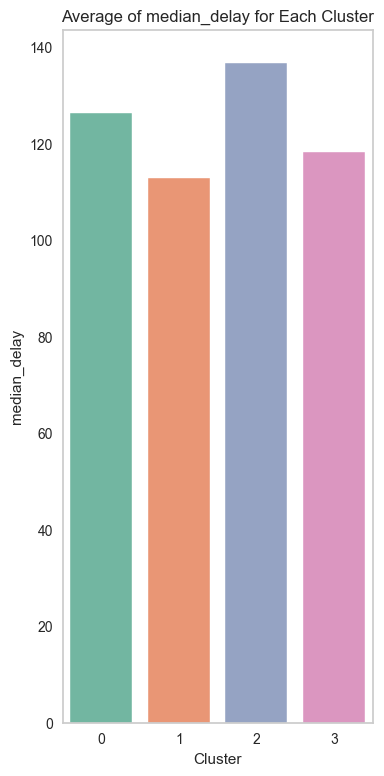

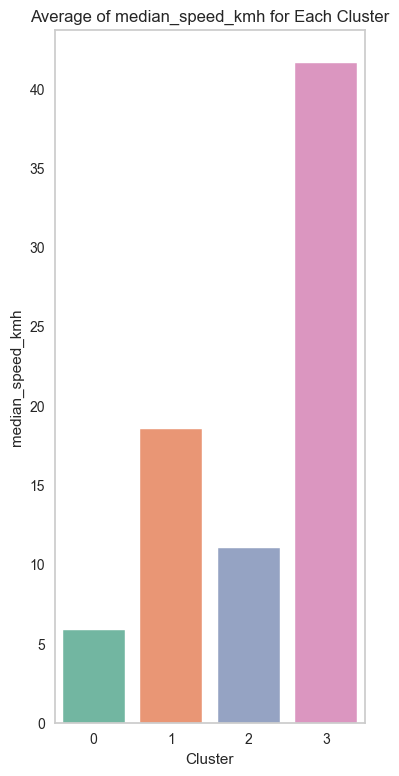

In [148]:
# Average Median Delay for Each Cluster
for n in numeric: 
    plt.figure(figsize=(4,9))
    sns.barplot(x="Cluster", y=n, data=model_df, estimator='mean', palette='Set2', errorbar=None)
    plt.title('Average of {} for Each Cluster'.format(n))
    plt.show()

In [169]:
# Cluster profile
cluster_profile = model_df.groupby('Cluster')[['level','median_length', 'median_delay', 'median_speed_kmh']].mean().reset_index()
cluster_profile.to_excel(r'C:\Ayub Indra\Data Analyst\DSLS 2023\Mini Project Data Scientist\Datasets\final\cluster_profile.xlsx', index=False)
cluster_profile

,Cluster,level,median_length,median_delay,median_speed_kmh
0,0,3.051082,271.611074,126.387758,5.822751
1,1,1.850109,1068.669800,112.952095,18.542061
2,2,2.397706,577.829484,136.736435,10.994216
3,3,1.553312,3020.039964,118.324806,41.616460
